In [71]:
# for text preprocessing
import re
import spacy

from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string

# import numpy for matrix operation
import numpy as np

# Importing Gensim
import gensim
from gensim import corpora

C:\Users\gauri\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
from warnings import filterwarnings
filterwarnings('ignore')

C:\Users\gauri\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [73]:
nlp = spacy.load('en_core_web_sm')

In [74]:
D1 = 'I want to watch a movie this weekend.How are you'
D2 =  'I went shopping yesterday. New Zealand won the World Test Championship by beating India by eight wickets at Southampton.'
D3 =  'I don’t watch cricket. Netflix and Amazon Prime have very good movies to watch.'
D4 =  'Movies are a nice way to chill however, this time I would like to paint and read some good books. It’s been long!'
D5 =  'This blueberry milkshake is so good! Try reading Dr. Joe Dispenza’s books. His work is such a game-changer! His books' 

In [75]:
corpus = [D1, D2, D3, D4, D5]

In [76]:
corpus

['I want to watch a movie this weekend.How are you',
 'I went shopping yesterday. New Zealand won the World Test Championship by beating India by eight wickets at Southampton.',
 'I don’t watch cricket. Netflix and Amazon Prime have very good movies to watch.',
 'Movies are a nice way to chill however, this time I would like to paint and read some good books. It’s been long!',
 'This blueberry milkshake is so good! Try reading Dr. Joe Dispenza’s books. His work is such a game-changer! His books']

In [77]:
# stop loss words 
stop = set(stopwords.words('english'))

# punctuation 
exclude = set(string.punctuation) 

# lemmatization
lemma = WordNetLemmatizer() 

# One function for all the steps:
def clean(doc):
    
    # convert text into lower case + split into words
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    
    # remove any stop words present
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)  
    
    # remove punctuations + normalize the text
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())  
    return normalized

In [78]:
clean_corpus = [clean(doc).split()  for doc in corpus]  

In [46]:
D1 = 'I want to watch a movie this weekend.How are you this weekend'
D2 =  'I went shopping yesterday. New Zealand won the World Test Championship by beating India by eight wickets at Southampton.'
D3 =  'I don’t watch cricket. Netflix and Amazon Prime have very good movies to watch.'
D4 =  'Movies are a nice way to chill however, this time I would like to paint and read some good books. It’s been long!'
D5 =  'This blueberry milkshake is so good! Try reading Dr. Joe Dispenza’s books. His work is such a game-changer! His books' 

In [79]:
 clean_corpus

[['want', 'watch', 'movie', 'weekendhow'],
 ['went',
  'shopping',
  'yesterday',
  'new',
  'zealand',
  'world',
  'test',
  'championship',
  'beating',
  'india',
  'eight',
  'wicket',
  'southampton'],
 ['don’t',
  'watch',
  'cricket',
  'netflix',
  'amazon',
  'prime',
  'good',
  'movie',
  'watch'],
 ['movie',
  'nice',
  'way',
  'chill',
  'however',
  'time',
  'would',
  'like',
  'paint',
  'read',
  'good',
  'book',
  'it’s',
  'long'],
 ['blueberry',
  'milkshake',
  'good',
  'try',
  'reading',
  'dr',
  'joe',
  'dispenza’s',
  'book',
  'work',
  'gamechanger',
  'book']]

In [80]:
dict_ = corpora.Dictionary(clean_corpus)


In [54]:
dict_

In [23]:
print(dict_)

Dictionary<44 unique tokens: ['movie', 'want', 'watch', 'weekend', 'beating']...>


In [81]:
doc_term_matrix = [dict_.doc2bow(i) for i in clean_corpus] #passing each doc to doc matrix

In [57]:
doc_term_matrix2 = []

In [58]:
for i in clean_corpus:
    new = dict_.doc2bow(i)
    doc_term_matrix2.append(new)
    

In [26]:
D1 = 'I want want to watch a movie this weekend.'
D2 =  'I went shopping yesterday. New Zealand won the World Test Championship by beating India by eight wickets at Southampton.'
D3 =  'I don’t watch cricket. Netflix and Amazon Prime have very good movies to watch.'
D4 =  'Movies are a nice way to chill however, this time I would like to paint and read some good books. It’s been long!'
D5 =  'This blueberry milkshake is so good! Try reading Dr. Joe Dispenza’s books. His work is such a game-changer! His books' 

In [59]:
 doc_term_matrix2

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)],
 [(5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1)],
 [(0, 1), (2, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1)],
 [(0, 1),
  (21, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1)],
 [(21, 1),
  (24, 2),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1)]]

In [45]:
doc_term_matrix  #[(0, 1), (1, 1), (2, 1), (3, 1)]--- this is one document  

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1)],
 [(0, 1), (2, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)],
 [(0, 1),
  (20, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1)],
 [(20, 1),
  (23, 2),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1)]]

doc_term_matrix  #[(0, 1), (1, 1), (2, 1), (3, 1)]--- this is one document  ['went',
  'shopping',
  'yesterday',
  'new',
  'zealand',
  'world',
  'test',
  'championship',
  'beating',
  'india',
  'eight',
  'wicket',
  'southampton']

In [56]:
doc_term_matrix #[['want', 'watch', 'movie', 'weekendhow', 'weekend'],

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)],
 [(5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1)],
 [(0, 1), (2, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1)],
 [(0, 1),
  (21, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1)],
 [(21, 1),
  (24, 2),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1)]]

In [35]:
[[(dict_[id], freq) for id, freq in cp] for cp in corpus[:1]]

ValueError: not enough values to unpack (expected 2, got 1)

In [82]:
Lda = gensim.models.ldamodel.LdaModel

In [83]:

ldamodel = Lda(doc_term_matrix, num_topics=6, id2word = dict_, passes=1, random_state=0, eval_every=None)

In [86]:
a = ldamodel.print_topics()


In [87]:
a

[(0,
  '0.057*"world" + 0.057*"southampton" + 0.057*"zealand" + 0.057*"championship" + 0.057*"eight" + 0.057*"new" + 0.057*"wicket" + 0.057*"shopping" + 0.057*"test" + 0.057*"beating"'),
 (1,
  '0.023*"watch" + 0.023*"movie" + 0.023*"want" + 0.023*"good" + 0.023*"weekendhow" + 0.023*"book" + 0.023*"prime" + 0.023*"netflix" + 0.023*"amazon" + 0.023*"joe"'),
 (2,
  '0.095*"book" + 0.065*"good" + 0.035*"movie" + 0.035*"it’s" + 0.035*"dispenza’s" + 0.035*"paint" + 0.035*"time" + 0.035*"way" + 0.035*"long" + 0.035*"reading"'),
 (3,
  '0.023*"movie" + 0.023*"watch" + 0.023*"want" + 0.023*"weekendhow" + 0.023*"good" + 0.023*"book" + 0.023*"prime" + 0.023*"went" + 0.023*"would" + 0.023*"yesterday"'),
 (4,
  '0.103*"movie" + 0.103*"weekendhow" + 0.103*"watch" + 0.103*"want" + 0.015*"good" + 0.015*"book" + 0.015*"went" + 0.015*"amazon" + 0.015*"prime" + 0.015*"cricket"'),
 (5,
  '0.133*"watch" + 0.071*"movie" + 0.071*"good" + 0.071*"cricket" + 0.071*"don’t" + 0.071*"netflix" + 0.071*"amazon" + 0

In [90]:
a[:2][1]

(1,
 '0.023*"watch" + 0.023*"movie" + 0.023*"want" + 0.023*"good" + 0.023*"weekendhow" + 0.023*"book" + 0.023*"prime" + 0.023*"netflix" + 0.023*"amazon" + 0.023*"joe"')

In [39]:
ldamodel.show_topics(num_words=10, formatted=False)

[(0,
  [('world', 0.057357166),
   ('southampton', 0.05735527),
   ('zealand', 0.05735216),
   ('championship', 0.057349794),
   ('eight', 0.057347685),
   ('new', 0.057347022),
   ('wicket', 0.057346858),
   ('shopping', 0.05734601),
   ('test', 0.05734443),
   ('beating', 0.057344135)]),
 (1,
  [('want', 0.022824783),
   ('watch', 0.022806449),
   ('movie', 0.022777785),
   ('good', 0.02276728),
   ('book', 0.02273984),
   ('weekend', 0.022732534),
   ('prime', 0.022730265),
   ('netflix', 0.022729326),
   ('amazon', 0.022728752),
   ('joe', 0.022724386)]),
 (2,
  [('book', 0.09498497),
   ('good', 0.06498759),
   ('movie', 0.035006292),
   ('it’s', 0.034998365),
   ('dispenza’s', 0.034997724),
   ('paint', 0.034995466),
   ('time', 0.034995105),
   ('way', 0.034994997),
   ('long', 0.034994222),
   ('reading', 0.034993693)]),
 (3,
  [('want', 0.022817224),
   ('movie', 0.022788346),
   ('watch', 0.022781398),
   ('good', 0.022758443),
   ('book', 0.02275271),
   ('weekend', 0.022750

In [44]:
all_topics = ldamodel.get_document_topics(doc_term_matrix,)


In [48]:
lda_corpus= ldamodel[doc_term_matrix]

In [49]:
lda_corpus

In [46]:
num_docs = len(all_topics)

In [47]:
num_docs

5

In [50]:
all_topics_csr= gensim.matutils.corpus2csc(all_topics)
all_topics_numpy= all_topics_csr.T.toarray()

major_topic= [np.argmax(arr) for arr in all_topics_numpy]
df_orig['major_lda_topic']= major_topic

NameError: name 'df_orig' is not defined

In [55]:
from gensim.models import CoherenceModel
coherence_model_lda=CoherenceModel(model=ldamodel,texts=clean_corpus,dictionary=dict_,coherence='c_v')
coherence_lda=coherence_model_lda.get_coherence()
print('\nCoherence Score:',coherence_lda)


Coherence Score: 0.4427748999629768


In [58]:
topics=ldamodel.top_topics(doc_term_matrix)

In [60]:
len(topics)

6

In [70]:
topics

C:\Users\gauri\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'topics' is not defined

In [66]:
ldamodel.show_topics(5)

[(1,
  '0.023*"want" + 0.023*"watch" + 0.023*"movie" + 0.023*"good" + 0.023*"book" + 0.023*"weekend" + 0.023*"prime" + 0.023*"netflix" + 0.023*"amazon" + 0.023*"joe"'),
 (2,
  '0.095*"book" + 0.065*"good" + 0.035*"movie" + 0.035*"it’s" + 0.035*"dispenza’s" + 0.035*"paint" + 0.035*"time" + 0.035*"way" + 0.035*"long" + 0.035*"reading"'),
 (0,
  '0.057*"world" + 0.057*"southampton" + 0.057*"zealand" + 0.057*"championship" + 0.057*"eight" + 0.057*"new" + 0.057*"wicket" + 0.057*"shopping" + 0.057*"test" + 0.057*"beating"'),
 (5,
  '0.133*"watch" + 0.071*"movie" + 0.071*"good" + 0.071*"cricket" + 0.071*"don’t" + 0.071*"netflix" + 0.071*"amazon" + 0.071*"prime" + 0.010*"want" + 0.010*"book"'),
 (3,
  '0.023*"want" + 0.023*"movie" + 0.023*"watch" + 0.023*"good" + 0.023*"book" + 0.023*"weekend" + 0.023*"prime" + 0.023*"went" + 0.023*"would" + 0.023*"yesterday"')]

In [70]:
y = np.array(ldamodel.show_topics(num_topics=6, num_words=10))
for i in y[:,1]:
    #if i != '%d':
      #  print([str(word) for word in i])
    print(i)

0.057*"world" + 0.057*"southampton" + 0.057*"zealand" + 0.057*"championship" + 0.057*"eight" + 0.057*"new" + 0.057*"wicket" + 0.057*"shopping" + 0.057*"test" + 0.057*"beating"
0.023*"want" + 0.023*"watch" + 0.023*"movie" + 0.023*"good" + 0.023*"book" + 0.023*"weekend" + 0.023*"prime" + 0.023*"netflix" + 0.023*"amazon" + 0.023*"joe"
0.095*"book" + 0.065*"good" + 0.035*"movie" + 0.035*"it’s" + 0.035*"dispenza’s" + 0.035*"paint" + 0.035*"time" + 0.035*"way" + 0.035*"long" + 0.035*"reading"
0.023*"want" + 0.023*"movie" + 0.023*"watch" + 0.023*"good" + 0.023*"book" + 0.023*"weekend" + 0.023*"prime" + 0.023*"went" + 0.023*"would" + 0.023*"yesterday"
0.175*"want" + 0.095*"movie" + 0.094*"weekend" + 0.094*"watch" + 0.014*"good" + 0.014*"book" + 0.014*"went" + 0.014*"amazon" + 0.014*"prime" + 0.014*"cricket"
0.133*"watch" + 0.071*"movie" + 0.071*"good" + 0.071*"cricket" + 0.071*"don’t" + 0.071*"netflix" + 0.071*"amazon" + 0.071*"prime" + 0.010*"want" + 0.010*"book"


In [68]:
import  pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

vis= pyLDAvis.gensim.prepare(ldamodel,doc_term_matrix,dict_)
vis

C:\Users\gauri\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ModuleNotFoundError: No module named 'pyLDAvis.gensim_models'

In [61]:
!pip install pyldavis

  Using cached pyLDAvis-3.3.1.tar.gz (1.7 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136882 sha256=491a67e17649de69f411147a50eb96b590ef94d0e366140e6442ef76bb7135b0
  Stored in directory: c:\users\gauri\appdata\local\pip\cache\wheels\90\61\ec\9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=912eaf091bc4f14dbcb7b28677fa78ffc3519937375d18a527df3f179c477bbf
  Stored in directory: c:\users\gauri\appdata\local\

In [66]:
!pip install pyLDAvis==2.1.2

C:\Users\gauri\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=3d47139708115d084c3e348849da7054bda108ae7231172a4ee36cce3450b4ce
  Stored in directory: c:\users\gauri\appdata\local\pip\cache\wheels\31\8c\a0\24a443892f2134e691d59c8c6c35e19821e02f85e49871f8fd
Successfully built pyLDAvis
  Attempting uninstall: pyLDAvis
    Found existing installation: pyLDAvis 3.3.1
    Uninstalling pyLDAvis-3.3.1:
      Successfully uninstalled pyLDAvis-3.3.1


In [ ]:
[(0,
  [('world', 0.057357166),
   ('southampton', 0.05735527),
   ('zealand', 0.05735216),
   ('championship', 0.057349794),
   ('eight', 0.057347685),
   ('new', 0.057347022),
   ('wicket', 0.057346858),
   ('shopping', 0.05734601),
   ('test', 0.05734443),
   ('beating', 0.057344135)]),

In [ ]:
dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]

In [80]:
for i, row in enumerate(ldamodel[doc_term_matrix]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        print(row)

[(4, 0.86091626), (5, 0.027946794), (2, 0.027800994), (1, 0.027778894), (3, 0.027778894), (0, 0.027778193)] 0
[(0, 0.94047296), (1, 0.011905747), (3, 0.011905747), (4, 0.011905346), (5, 0.011905208), (2, 0.011904997)] 1
[(5, 0.91657627), (4, 0.016720848), (2, 0.016700564), (1, 0.016667642), (3, 0.016667642), (0, 0.01666703)] 2
[(2, 0.94438946), (5, 0.0111377165), (4, 0.011136239), (1, 0.011112486), (3, 0.011112486), (0, 0.011111623)] 3
[(2, 0.935882), (5, 0.012831637), (1, 0.012821968), (3, 0.012821968), (4, 0.012821379), (0, 0.012821052)] 4


In [81]:
 wp = ldamodel.show_topic(0)

In [89]:
 wp

[('world', 0.057357166),
 ('southampton', 0.05735527),
 ('zealand', 0.05735216),
 ('championship', 0.057349794),
 ('eight', 0.057347685),
 ('new', 0.057347022),
 ('wicket', 0.057346858),
 ('shopping', 0.05734601),
 ('test', 0.05734443),
 ('beating', 0.057344135)]

In [82]:
wp

[('world', 0.057357166),
 ('southampton', 0.05735527),
 ('zealand', 0.05735216),
 ('championship', 0.057349794),
 ('eight', 0.057347685),
 ('new', 0.057347022),
 ('wicket', 0.057346858),
 ('shopping', 0.05734601),
 ('test', 0.05734443),
 ('beating', 0.057344135)]

In [87]:
 sent_topics_df = pd.DataFrame()

In [88]:
topic_keywords = ", ".join([word for word, prop in wp])
sent_topics_df = sent_topics_df.append(pd.Series([int(0)pic_num, round(prop_topic,4), topic_keywords]), ignore_index=True)

NameError: name 'topic_num' is not defined

In [84]:
import pandas as pd
contents = pd.Series(clean_corpus)
    

In [85]:
contents 

0                  [want, want, watch, movie, weekend]
1    [went, shopping, yesterday, new, zealand, worl...
2    [don’t, watch, cricket, netflix, amazon, prime...
3    [movie, nice, way, chill, however, time, would...
4    [blueberry, milkshake, good, try, reading, dr,...
dtype: object

In [ ]:
def format_topics_sentences(ldamodel=ldamodel, corpus=doc_term_matrix, texts=clean_corpus):
    # Init output
    sent_topics_df = pd.DataFrame()
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    #sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodeltoo0, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)


Topic coherence measures the average similarity between top words having the highest weights in a topic i.e relative distance between the top words.



In [ ]:
def compute_coherence_values(dictionary, corpus, texts, num_topics_range,alpha_range):
    coherence_values=[]
    model_list=[]
    for alpha in alpha_range:
        for num_topics in num_topics_range:
            

In [ ]:
model=ldamodel,texts=clean_corpus,dictionary=dict_,coherence='c_v'

In [100]:
  def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = Lda(doc_term_matrix, num_topics=6, id2word = dict_, passes=1, random_state=0, eval_every=None)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [106]:
model_list[0]

In [113]:
coherence_lda=CoherenceModel(model=model_list[2], texts=clean_corpus, dictionary=dict_, coherence='c_v')

In [110]:
coherence_lda

In [114]:
coherence_value=coherence_lda.get_coherence()

In [115]:
coherence_value

0.4427748999629768

In [101]:
model_list, coherence_values = compute_coherence_values(dictionary=dict_, corpus=doc_term_matrix, texts=clean_corpus, start=2, limit=40, step=6)

In [102]:
coherence_values

[0.4427748999629768,
 0.4427748999629768,
 0.4427748999629768,
 0.4427748999629768,
 0.4427748999629768,
 0.4427748999629768,
 0.4427748999629768]

In [98]:
model_list

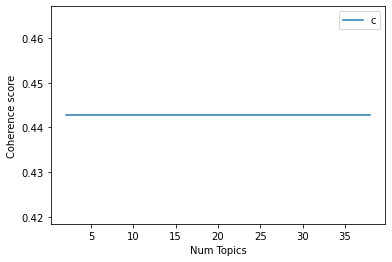

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [19]:
from bertopic import BERTopic

ModuleNotFoundError: No module named 'bertopic'

In [17]:
!pip install bertopic

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\gauri\anaconda3\python.exe' 'C:\Users\gauri\anaconda3\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py' build_wheel 'C:\Users\gauri\AppData\Local\Temp\tmpfu57aus6'
       cwd: C:\Users\gauri\AppData\Local\Temp\pip-install-gyh4i748\hdbscan_26b7d4d2804c43919d7c97783fb79512
  Complete output (40 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-38
  creating build\lib.win-amd64-cpython-38\hdbscan
  copying hdbscan\flat.py -> build\lib.win-amd64-cpython-38\hdbscan
  copying hdbscan\hdbscan_.py -> build\lib.win-amd64-cpython-38\hdbscan
  copying hdbscan\plots.py -> build\lib.win-amd64-cpython-38\hdbscan
  copying hdbscan\prediction.py -> build\lib.win-amd64-cpython-38\hdbscan
  copying hdbscan\robust_single_linkage_.py -> build\lib.win-amd64-cpython-38\hdbscan
  copying hdbscan\validity.py -> build\lib.win-amd64-cpython-38\hdbscan
  copy


  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125918 sha256=967f51427f4048116abe97fed041be0490d5cc9e8fff3323789a3e14fbe53d86
  Stored in directory: c:\users\gauri\appdata\local\pip\cache\wheels\5e\6f\8c\d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82820 sha256=8bdf63b44615c04f74e6bb8851933fb3143b9355c66940e3711a44d1ea6e4338
  Stored in directory: c:\users\gauri\appdata\local\pip\cache\wheels\a9\3a\67\06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54271 sha256=33dd07c1e9d8c8911430645327f7dc7a2387bd87d6e7c919cacd11dfa011664b
  Stored in directory: c:\users\gauri\appdata\local\pip\cache\wheels\1b\38\fe\99e22fbae88abd1c5e8d99253cba6d1c590cc7a94408bff3bf
Successfully built sentence-transformers umap-learn pynndescent
Failed to build hdbscan



ERROR: Could not build wheels for hdbscan which use PEP 517 and cannot be installed directly


In [ ]:
!conda install -c conda-forge hdbscan


The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda-client==1.8.0=py38haa95532_0
  - defaults/win-64::anaconda==custom=py38_1
  - defaults/win-64::anaconda-navigator==2.0.3=py38_0
  - defaults/noarch::anaconda-project==0.10.0=pyhd3eb1b0_0
  - defaults/win-64::astropy==4.2.1=py38h2bbff1b_1
  - defaults/win-64::bkcharts==0.2=py38_0
  - defaults/noarch::black==19.10b0=py_0
  - defaults/win-64::bokeh==2.3.3=py38haa95532_0
  - defaults/win-64::bottleneck==1.3.2=py38h2a96729_1
  - defaults/noarch::click==8.0.1=pyhd3eb1b0_0
  - defaults/noarch::conda-repo-cli==1.0.4=pyhd3eb1b0_0
  - defaults/noarch::conda-verify==3.4.2=py_1
  - defaults/noarch::dask==2021.6.2=pyhd3eb1b0_0
  - defaults/win-64::distributed==2021.6.2=py38haa95532_0
  - defaults/noarch::flake8==3.9.0=pyhd3eb1b0_0
  - conda-forge/label/gcc7/noarch::flasgger==0.9.1=py_0
  - defaults/noarch::flask==1.1.2=pyhd3eb1b0_0
  - defaul

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\gauri\anaconda3

  added / updated specs:
    - hdbscan


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.9.14  |       h5b45459_0         189 KB  conda-forge
    certifi-2022.9.14          |     pyhd8ed1ab_0         156 KB  conda-forge
    conda-4.14.0               |   py38haa244fe_0         1.0 MB  conda-forge
    hdbscan-0.8.28             |   py38h6f4d8f0_1         496 KB  conda-forge
    mkl-2021.4.0               |     haa95532_640       114.9 MB
    numpy-1.21.5               |   py38h7a0a035_3          25 KB
    numpy-base-1.21.5          |   py38hca35cd5_3         4.4 MB
    openssl-1.1.1q             |       h8ffe710_0         5.8 MB  conda-forge
    pandas-1.4.3               |   py38hcc40339_0        11.0 MB  conda-forge
    scipy-1.7.3                |   py38h0